In [1]:
import pandas as pd
import os

In [27]:
data_path = 'data'
group_col = 'srch_id'

file_1 = 'submission_18'
w1 = 0.35
file_2 = 'submission_19'
w2 = 0.65

total_name = 'submission_20'
total_filename = f'submissions/{total_name}.csv'

In [3]:
from utils import validate_submission

validate_submission(os.path.join(data_path, 'submission_sample.csv'),
                    os.path.join('submissions', f'{file_1}.csv'),
                    group_col)

validate_submission(os.path.join(data_path, 'submission_sample.csv'),
                    os.path.join('submissions', f'{file_2}.csv'),
                    group_col)

everything is ok to submit
everything is ok to submit


In [4]:
subm_1 = pd.read_csv(f'submissions/{file_1}_scores.csv')
subm_1.head()

,srch_id,prop_id,ord
0,1,99484,0.676510
1,1,54937,0.563983
2,1,61934,0.543081
3,1,24194,0.258734
4,1,28181,0.248371


In [5]:
subm_2 = pd.read_csv(f'submissions/{file_2}_scores.csv')
subm_2.head()

,srch_id,prop_id,pred
0,1,99484,3.080002
1,1,54937,2.781211
2,1,28181,2.651430
3,1,61934,2.534519
4,1,95031,2.388750


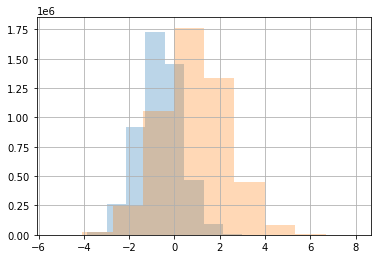

In [7]:
subm_1['ord'].hist(alpha=0.3)
subm_2['pred'].hist(alpha=0.3);

In [8]:
def normalize_by_group(df, by):
    groups = df.groupby(by)
    # computes group-wise mean/std,
    # then auto broadcasts to size of group chunk
    mean = groups.transform("mean")
    std = groups.transform("std")
    normalized = (df[mean.columns] - mean) / std
    return normalized

In [14]:
subm_1['ord'] = subm_1.groupby(group_col)['ord'].transform(lambda x: (x - x.mean()) / x.std())
subm_2['pred'] = subm_2.groupby(group_col)['pred'].transform(lambda x: (x - x.mean()) / x.std())

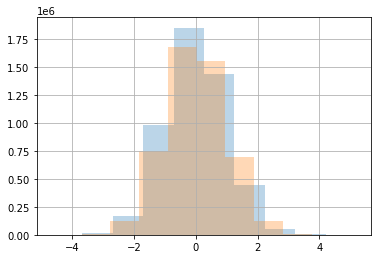

In [15]:
subm_1['ord'].hist(alpha=0.3)
subm_2['pred'].hist(alpha=0.3);

In [16]:
merged_df = pd.merge(subm_1, subm_2, on=[group_col, 'prop_id'], how='inner')

In [19]:
len(merged_df) == len(subm_1)

True

In [24]:
merged_df['final_score'] = merged_df['ord']*w1 + merged_df['pred']*w2
merged_df

,srch_id,prop_id,ord,pred,final_score
0,1,99484,1.746829,1.846079,1.811342
1,1,54937,1.561529,1.490718,1.515502
2,1,61934,1.527110,1.197320,1.312746
3,1,24194,1.058872,0.892195,0.950532
4,1,28181,1.041808,1.336365,1.233270
...,...,...,...,...,...
4959178,332787,32019,0.158426,-0.176642,-0.059369
4959179,332787,29018,0.033662,-0.080091,-0.040277
4959180,332787,99509,-0.229726,0.294799,0.111215
4959181,332787,94437,-0.440834,-0.618314,-0.556196


In [25]:
merged_df.sort_values(by=[group_col, 'final_score'], ascending=[True, False], inplace=True)
merged_df

,srch_id,prop_id,ord,pred,final_score
0,1,99484,1.746829,1.846079,1.811342
1,1,54937,1.561529,1.490718,1.515502
2,1,61934,1.527110,1.197320,1.312746
4,1,28181,1.041808,1.336365,1.233270
3,1,24194,1.058872,0.892195,0.950532
...,...,...,...,...,...
4959180,332787,99509,-0.229726,0.294799,0.111215
4959179,332787,29018,0.033662,-0.080091,-0.040277
4959178,332787,32019,0.158426,-0.176642,-0.059369
4959181,332787,94437,-0.440834,-0.618314,-0.556196


In [28]:
merged_df[[group_col, 'prop_id']].to_csv(total_filename, index=False)
pd.read_csv(total_filename, nrows=10)

,srch_id,prop_id
0,1,99484
1,1,54937
2,1,61934
3,1,28181
4,1,24194
5,1,95031
6,1,34263
7,1,82231
8,1,50162
9,1,63894


In [31]:
from utils import validate_submission
validate_submission(os.path.join(data_path, 'submission_sample.csv'),
                    total_filename, group_col)

everything is ok to submit
